#  Data Anonymization and Privacy-Enhancing Technologies (PETs)

## 🎯 Learning Goals
- Understand what data anonymization is and why it matters.
- Apply anonymization techniques to structured, text and audio data.
- Understand how anonymization supports compliance with privacy laws (GDPR, CCPA).

### 🔐 Introduction to Data Anonymization

- **Data anonymization** removes personally identifiable information (PII) from datasets.
- **Pseudonymization** retains a link to identity (e.g., using a key); anonymization does not.

### 🧰 Techniques for Anonymizing Different Data Types
- **Structured Data**: k-anonymity, l-diversity, t-closeness
- **Text Data**: Named Entity Recognition (NER) + masking
- **Images**: Face blurring, pixelation
- **Audio**: Voice masking, pitch shift

### 📜 Legal Relevance
- **GDPR & CCPA**: Require data minimization and protection.
- Anonymization helps avoid processing 'personal data' under these laws.

##  Part 1: Structured Data Anonymization (k-Anonymity)

### 💡 Task 1 

#### Description:
You are provided with a structured dataset (CSV file) containing personal attributes like Age, Education, Occupation, Relationship, Sex, and Country. Your task is to anonymize this data using **k-anonymity** by binning continuous data (like Age) and generalizing or masking quasi-identifiers such as Country or Occupation. Then assess whether individual identities could still be inferred.


- Generalize and group quasi-identifiers (e.g., Age and Country)
- Ensure each combination of quasi-identifiers occurs at least **k** times
- Evaluate anonymity level before and after transformation


In [ ]:
!pip install pandas scikit-learn spacy opencv-python-headless matplotlib librosa pydub
!python -m spacy download en_core_web_sm

### 💡 Task 1.1 : Upload and Load the Dataset 

- Upload the dataset from your local machine to Colab.
- Read it into a pandas DataFrame.
- Preview the first few rows.



In [ ]:
# Upload the dataset from  drive link 
from google.colab import files
uploaded = files.upload()
# Load the uploaded CSV file
import pandas as pd

data = pd.read_csv("strucdata.csv")  # Use the name of the uploaded file
data.head()


### 💡 Task 1.2 : Clean and Standardize String Columns

- Whitespace and inconsistent casing can prevent accurate mapping.
- Standardize entries in Education, Occupation, and Country:
- Remove extra spaces.
- Capitalize words consistently.

In [ ]:
# Strip whitespace and convert to title case
for col in ['Education', 'Occupation', 'Country']:
    data[col] = data[col].str.strip().str.title()

# View distinct cleaned values
data[['Education', 'Occupation', 'Country']].drop_duplicates()


### 💡 Task 1.3: Bin the 'Age' Attribute into Groups

- Convert numerical Age into intervals (e.g., "21–30", "31–40").
- This reduces granularity and increases privacy.
- Binning helps meet the k-anonymity requirement.

In [ ]:
# Define bins and labels
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Apply binning
data['Age_group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# View the binned age groups
data[['Age', 'Age_group']].head()


### 💡 Task 1.4: Generalize Quasi-Identifiers

- Replace specific values with general categories:
  - Education: into HighSchool, Dropout, HigherEd, etc.
  - Occupation: into broader fields like Management, Labor, etc.
  - Country: into geographic regions (e.g., North America, Asia).
- These fields are quasi-identifiers and must be generalized to protect identity.


In [ ]:
# Generalize Education
education_map = {
    'Bachelors': 'HigherEd', 'Masters': 'HigherEd', 'Doctorate': 'HigherEd',
    'Hs-Grad': 'HighSchool', 'Some-College': 'HighSchool',
    '11Th': 'Dropout', '9Th': 'Dropout', '7Th-8Th': 'Dropout',
    'Assoc-Acdm': 'Associate', 'Assoc-Voc': 'Associate'
}

# Generalize Occupation
occupation_map = {
    'Adm-Clerical': 'Clerical', 'Exec-Managerial': 'Management',
    'Handlers-Cleaners': 'Manual Labor', 'Prof-Specialty': 'Professional',
    'Other-Service': 'Service', 'Sales': 'Sales',
    'Craft-Repair': 'Skilled Trade', 'Transport-Moving': 'Transport',
    'Farming-Fishing': 'Agriculture', 'Machine-Op-Inspct': 'Manufacturing'
}

# Generalize Country to Region
region_map = {
    'United-States': 'North America', 'Cuba': 'Latin America',
    'Jamaica': 'Latin America', 'India': 'Asia', 'Mexico': 'Latin America'
}

# Apply generalizations
data['Education_gen'] = data['Education'].replace(education_map)
data['Occupation_gen'] = data['Occupation'].replace(occupation_map)
data['Region'] = data['Country'].replace(region_map)

# View generalized fields
data[['Education_gen', 'Occupation_gen', 'Region']].drop_duplicates()



### 💡 Task 1.5: Apply k-Anonymity Check

- Define the list of quasi-identifiers (QIs).
- Group data by QIs and count the frequency of each group.
- Identify combinations that appear less than k times (violating anonymity).



In [ ]:
# Set the k value
k = 3

# Define quasi-identifier columns
qi_columns = ['Age_group', 'Education_gen', 'Occupation_gen', 'Relationship', 'Sex', 'Region']

# Count occurrences of each QI group
grouped = data.groupby(qi_columns).size().reset_index(name='Count')

# Identify violating combinations
violations = grouped[grouped['Count'] < k]

print(f"\nRows violating {k}-anonymity:")
violations



### 💡 Task 1.6: Save and Download Anonymized Data

- Select only the anonymized/generalized columns.
- Save the result to a new CSV.
- Provide download link for student use

In [ ]:
# Select only the anonymized fields
anonymized_columns = ['Age_group', 'Education_gen', 'Occupation_gen', 'Relationship', 'Sex', 'Region']
data_anonymized = data[anonymized_columns]

# Save the anonymized dataset
data_anonymized.to_csv("anonymized_k_anonymity.csv", index=False)

# Download the CSV file in Colab
from google.colab import files
files.download("anonymized_k_anonymity.csv")


🔐 What are l-Diversity and t-Closeness?

- l-Diversity extends k-anonymity by ensuring diversity in sensitive attributes (e.g., income, disease) within each group.
- t-Closeness ensures that the distribution of sensitive values in each group is close to the overall distribution.




### 💡 Task 1.7:  Apply l-Diversity

- Ensure that each group (based on quasi-identifiers) has at least l distinct values of the sensitive attribute. This protects against homogeneity attacks.

### 🧾 Instructions:
- Define quasi-identifiers (QI) and the sensitive attribute (e.g., 'Education').
- Group by QI.
- For each group, count the number of unique values in the sensitive attribute.
- Check if this count ≥ l.



In [ ]:
# l-Diversity Check

l = 2  # Minimum diversity level required
sensitive_attr = 'Education'

l_diverse_groups = []
non_diverse_groups = []

for name, group in data.groupby(qi_columns):
    diversity = group[sensitive_attr].nunique()
    if diversity >= l:
        l_diverse_groups.append(name)
    else:
        non_diverse_groups.append((name, diversity))

print(f"\n✅ Groups satisfying l={l}-diversity: {len(l_diverse_groups)}")
print(f"❌ Groups violating l-diversity:")
for g in non_diverse_groups:
    print(f"Group: {g[0]} | Unique sensitive values: {g[1]}")


### 💡 Task 1.8 : Apply t-Closeness

Prevent attribute disclosure by making sure that the distribution of sensitive values within each group is close to the global distribution (using Total Variation Distance).

### 🧾 Instructions:
- Compute global distribution of the sensitive attribute.
- For each group:
- Compute local distribution.
- Compare with global distribution using Total Variation Distance (TVD).
- Flag groups where TVD > threshold t.

In [ ]:
from numpy import sum as npsum

#  t-Closeness Check

t = 0.3  # Threshold for closeness
t_violations = []

# Global distribution
global_dist = data[sensitive_attr].value_counts(normalize=True)

for name, group in data.groupby(qi_columns):
    group_dist = group[sensitive_attr].value_counts(normalize=True)
    
    # Align indices
    group_dist = group_dist.reindex(global_dist.index, fill_value=0)
    
    # Total Variation Distance (TVD)
    distance = npsum(abs(group_dist - global_dist)) / 2
    
    if distance > t:
        t_violations.append((name, distance))

print(f"\n❌ Groups violating t-closeness (threshold={t}):")
for g in t_violations:
    print(f"Group: {g[0]} | Distance: {g[1]:.3f}")


##  Part 2: Text Anonymization with SpaCy (NER + Masking)

### 💡 Task 2 

#### Description:
You are provided with a dataset containing news headlines with columns: `publish_date`, `headline_category`, and `headline_text`. Your task is to anonymize the `headline_text` column using **Named Entity Recognition (NER)** to identify and mask named entities such as people, organizations, locations, and dates.



### 💡 Task 2.1: Install and Import Required Libraries

- Install spaCy and download the English language model.
- Import necessary libraries (spaCy, pandas).

### 🧾 Instructions:

- SpaCy is not installed by default in Colab; you must install it first.
- The English model (en_core_web_sm) is needed for NER.


In [ ]:
# Install spaCy and download the model
!pip install -U spacy
!python -m spacy download en_core_web_sm

# Import required libraries
import spacy
import pandas as pd



### 💡 Task 2.2: Load the Dataset

- Upload the CSV file containing text data.
- Load it using pandas.

### 🧾 Instructions:

Use the Colab file uploader to upload the dataset named legal_text_classification.csv.

In [ ]:
# Upload CSV
from google.colab import files
uploaded = files.upload()

# Load the CSV file into a DataFrame
data = pd.read_csv("legal_text_classification.csv")

# Preview the data
data.head()



### 💡 Task 2.3: Define the Anonymization Function

- Write a function using spaCy to identify named entities and mask them with labels.
- Handle missing or non-string data gracefully.

### 🧾 Instructions:

- Use spaCy's nlp() to process each text entry.
- Replace named entities with [LABEL].



In [ ]:
# Load spaCy NER model
nlp = spacy.load("en_core_web_sm")

# Function to anonymize named entities
def anonymize_text(text):
    if not isinstance(text, str):
        return ""  # Skip non-text entries
    doc = nlp(text)
    anonymized_text = text
    for ent in reversed(doc.ents):  # Replace from end to avoid offset issues
        if ent.label_ in ["PERSON", "GPE", "ORG", "LOC", "DATE", "TIME", "MONEY"]:
            anonymized_text = anonymized_text[:ent.start_char] + f"[{ent.label_}]" + anonymized_text[ent.end_char:]
    return anonymized_text




### 💡 Task 2.4: Apply Anonymization and Save Output

- Apply the anonymization function to the case_text column.
- Save the anonymized dataset to a new CSV.
- View anonymized examples.



In [ ]:
# Apply the anonymization function
data["Anonymized_Text"] = data["case_text"].apply(anonymize_text)

# Save anonymized data
data.to_csv("anonymized_dataset_text.csv", index=False)

# Display sample results
columns_to_show = [col for col in ["case_text", "Anonymized_Text", "Emotion"] if col in data.columns]
data[columns_to_show].head()


##  Part 3:  Audio Data Anonymization

Audio data anonymization refers to the process of altering audio data, such as voice recordings, to prevent the identification of the individual who produced the data while maintaining its overall utility for analysis. This is crucial for applications where personal audio data, such as speech recordings or voiceprints, are used. For example, in datasets like VoxCeleb, speaker identity can be easily inferred from voice features, making it essential to anonymize the audio in order to comply with privacy regulations


### 💡 Task 3

#### Description:
Anonymize audio data,by obscuring speaker identity while preserving the utility of the data for tasks like speech recognition, voice activity detection, or speaker verification.


### 💡 Task 3.1

###  Audio Preprocessing and Pitch Shifting


Start by loading an audio sample from the VoxCeleb dataset and applying a pitch shift to anonymize the speaker's voice.

#### **Instructions:**
1. Load an audio sample from the dataset.

2. Apply a pitch shift of +5 semitones to the audio.

3. Visualize the waveform of the original and pitch-shifted audio.




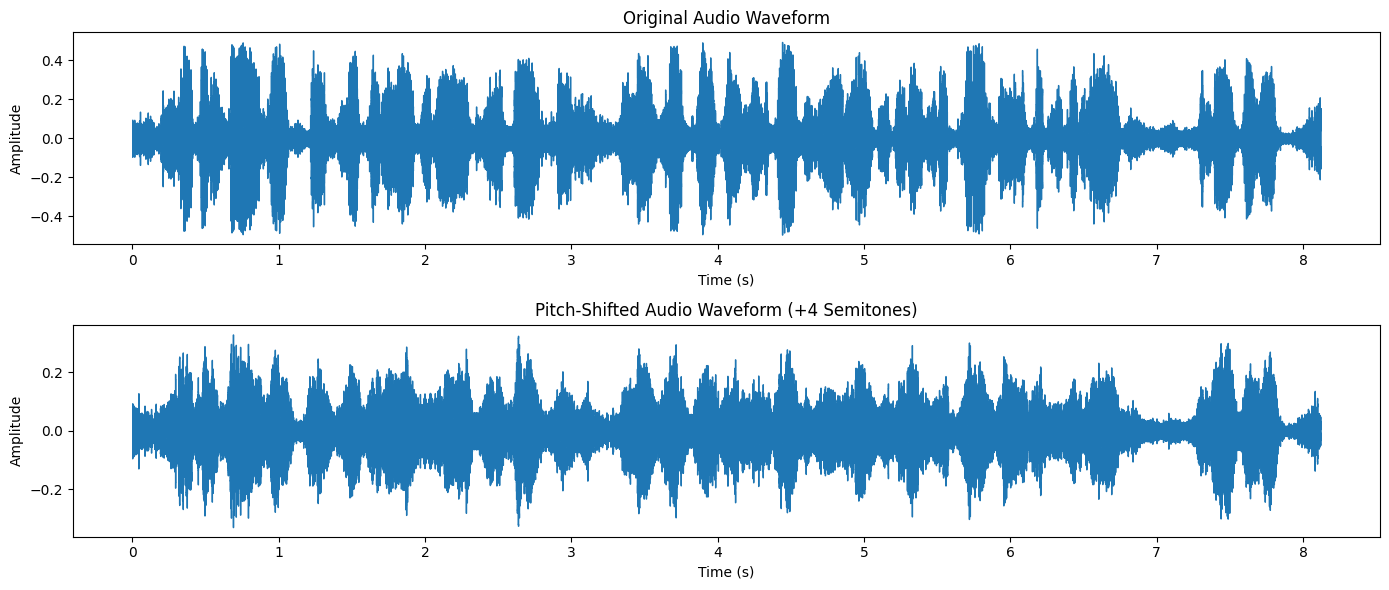

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
audio_path = 'C:/Users/HP/seminar/id10001_1zclwhmdeo4_00001.wav'
audio, sr = librosa.load(audio_path, sr=None)

# Apply pitch shifting (e.g., shift up by 4 semitones)
pitch_shifted = librosa.effects.pitch_shift(audio, sr=sr, n_steps=4)

# Plotting
plt.figure(figsize=(14, 6))

# Original waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Pitch-shifted waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(pitch_shifted, sr=sr)
plt.title('Pitch-Shifted Audio Waveform (+4 Semitones)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


###  💡 Task 3.2

### Time Stretching for Anonymization

Now, apply time stretching to alter the duration of the audio without changing its pitch. Choose a stretch rate of 1.2 (i.e., increase the length of the audio by 20%).

#### **Instructions:**


1. Apply time stretching to the same audio sample.

2. Visualize the waveforms of the original and time-stretched audio.

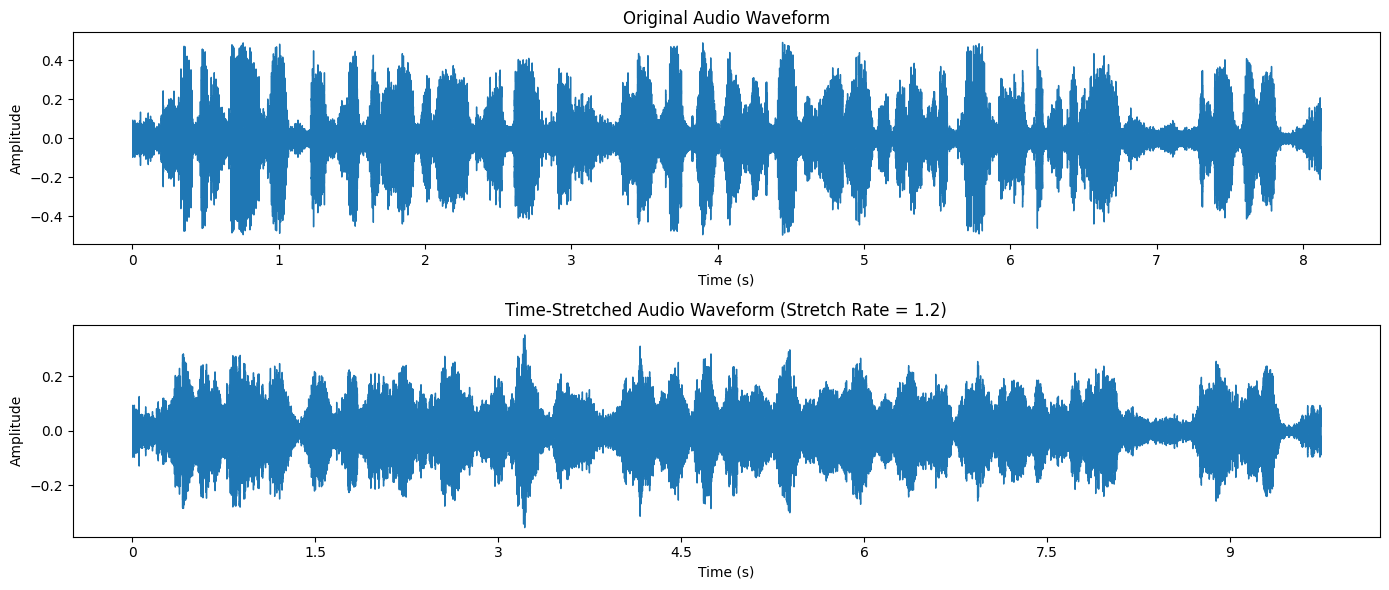

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_path = 'C:/Users/HP/seminar/id10001_1zclwhmdeo4_00001.wav'
audio, sr = librosa.load(audio_path, sr=None)

# Apply time stretching (increase duration by 20%)
# A rate < 1 slows down (stretches), > 1 speeds up (compresses)
stretch_rate = 1.2
audio_stretched = librosa.effects.time_stretch(audio, rate=1/stretch_rate)

# Plotting
plt.figure(figsize=(14, 6))

# Original waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Time-stretched waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(audio_stretched, sr=sr)
plt.title(f'Time-Stretched Audio Waveform (Stretch Rate = {stretch_rate})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


### 💡 Task 3.3 

### Adding Noise to Anonymize the Audio

Next, add background noise to the audio to further obscure the speaker’s identity.

#### **Instructions:**


1. Generate some random noise and add it to the audio.

2. Visualize the waveforms of the original and noisy audio.

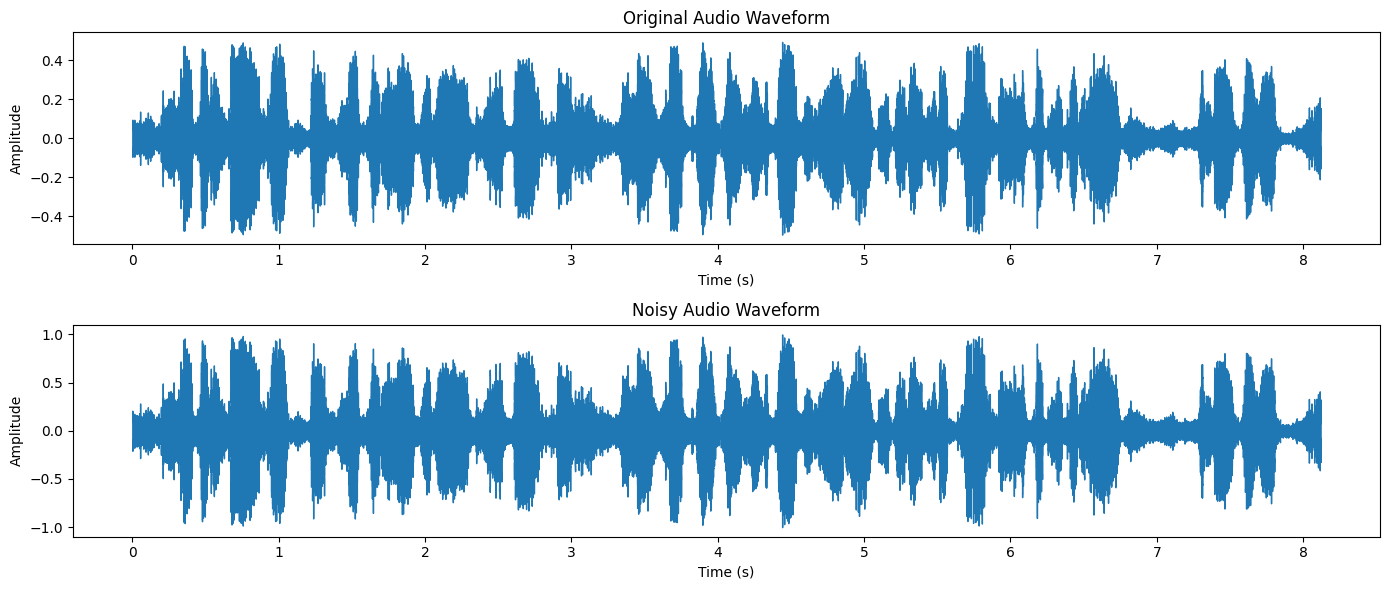

In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_path = 'C:/Users/HP/seminar/id10001_1zclwhmdeo4_00001.wav'
audio, sr = librosa.load(audio_path, sr=None)

# Generate white noise
noise_factor = 0.005  # Adjust for more or less noise
noise = np.random.randn(len(audio)) * noise_factor

# Add noise to the original audio
audio_noisy = audio + noise

# Normalize to prevent clipping
audio_noisy = audio_noisy / np.max(np.abs(audio_noisy))

# Plotting
plt.figure(figsize=(14, 6))

# Original waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Noisy waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(audio_noisy, sr=sr)
plt.title('Noisy Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


After running the code, reflect on the following:
- Audio Quality: Is the audio still understandable after anonymization?


- Speaker Anonymity: Can you identify the speaker from the anonymized audio?

- Preservation of Content: Does the anonymized audio still convey the intended information (e.g., speech recognition, speaker verification)?